# Assignment-04-Simple Linear Regression-1

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler

In [18]:
dataset=pd.read_csv('C:/Users/Payod/Downloads/delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [40]:
dataset1 = dataset.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
dataset1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


# Checking Outliers

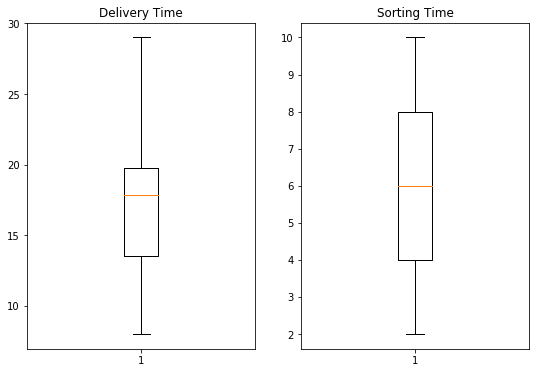

In [20]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dataset['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(dataset['Sorting Time'])
plt.title('Sorting Time')
plt.show()

# No Outliers Present as above Mentioned

# Feature Engineering

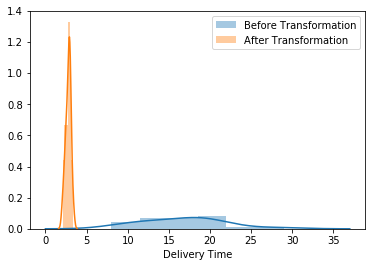

In [30]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset['Delivery Time'], bins = 6, kde = True)
sns.distplot(np.log(dataset['Delivery Time']), bins = 6, kde = True)
plt.legend(labels)
plt.show()

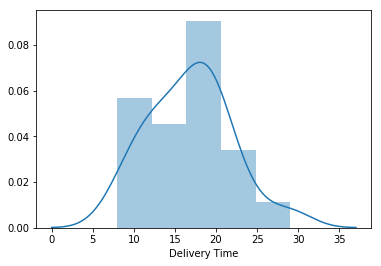

In [32]:
sns.distplot(dataset['Delivery Time'])

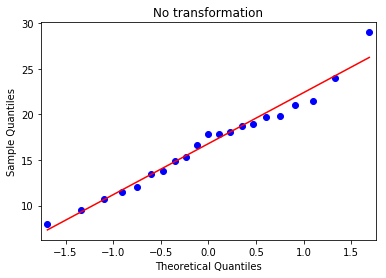

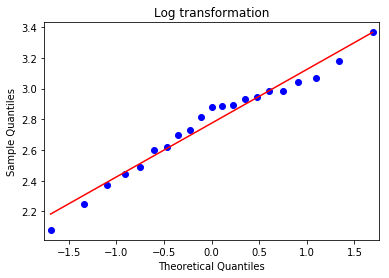

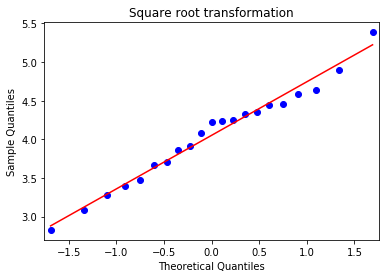

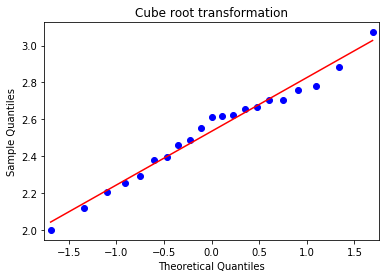

In [33]:
smf.qqplot(dataset['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(dataset['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

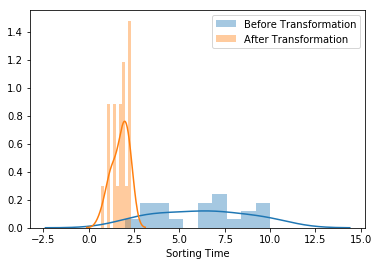

In [35]:
labels = ['Before Transformation','After Transformation']
sns.distplot(dataset['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(dataset['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

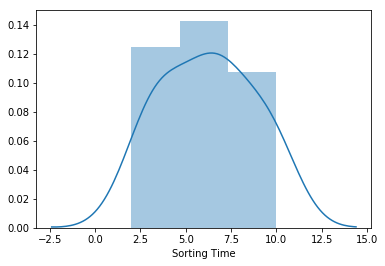

In [31]:
sns.distplot(dataset['Sorting Time'])

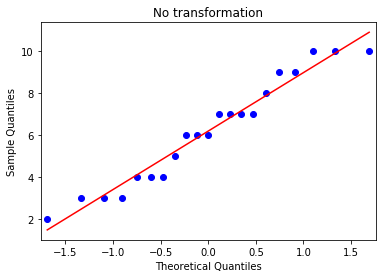

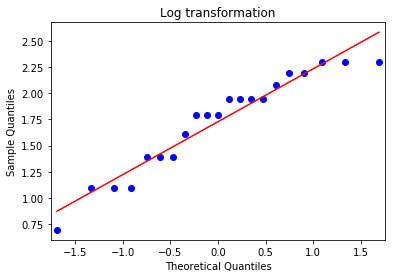

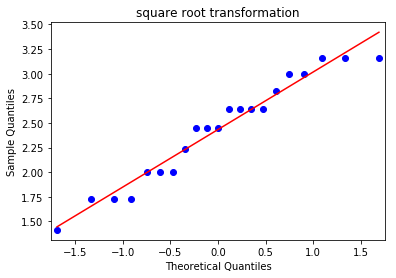

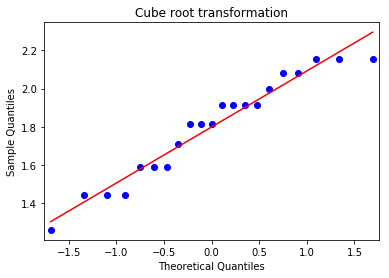

In [36]:
smf.qqplot(dataset['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(dataset['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(dataset['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(dataset['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [10]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


##### Correlation Analysis

In [11]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


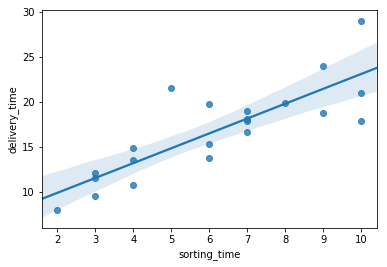

In [12]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

######  Model Building

In [13]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

######  Model Testing

In [14]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [15]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [16]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Predictions

In [18]:
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [17]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [19]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [20]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Transformations

OLS Regression

In [43]:
log_model = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = dataset1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 20 Apr 2022   Prob (F-statistic):           1.60e-07
Time:                           10:34:48   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
square_root_model = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = dataset1).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 20 Apr 2022   Prob (F-statistic):           8.48e-07
Time:                            10:33:25   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
cube_root_model = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = dataset1).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Wed, 20 Apr 2022   Prob (F-statistic):           4.90e-07
Time:                            10:34:34   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""